In [1]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def Ham_nonint(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] 
    hx_arr = [[hx,i] for i in range(L)] 
    J_arr = [[J,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["zz",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def Ham_int_antiferro(L,hz):
    basis = spin_basis_1d(L)
    
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr = [[J,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["zz",J_arr],["x",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

In [11]:
def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=1.0
    hx_lamb_arr = [[hx_lamb,i] for i in range(L)] # OBC
    static_lamb = [["x",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return op_lamb

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

def guage_potent_mu(Ham,L, mu):
    E,V= Ham.eigh()
    op_lamb= del_lambda_Ham(L)
    wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
    num_lamb = np.dot(V,np.dot(op_lamb.toarray(),np.conj(V)))
    A_lamb = -1j*num_lamb*wij/(wij**2+ mu**2)
    return A_lamb

In [67]:
muTot=40
mu_arr=np.logspace(-5,3.0,muTot)
L=8
norm_arr_nonint=np.zeros(muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_nonint[i]=norm(A_lamb)
    #print norm_arr_nonint[i], mu_arr[i]

In [65]:
muTot=40
mu_arr=np.logspace(-5,3.0,muTot)
L=8
hz=10.00
norm_arr_int=np.zeros(muTot)
H=Ham_int_antiferro(L,hz)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_int[i]=norm(A_lamb)
    #print norm_arr_int[i], mu_arr[i]

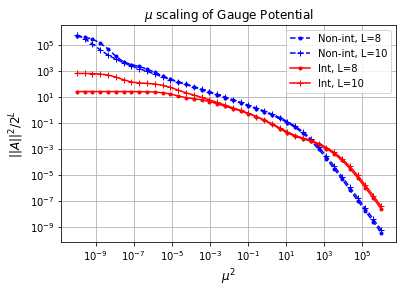

In [70]:
plt.loglog(mu_arr**2,norm_arr_nonint**2/2**8, 'b.--', label='Non-int, L=8')
plt.loglog(mu_arr**2,norm_arr_nonintL10**2/2**10, 'b+--', label='Non-int, L=10')
plt.loglog(mu_arr**2,norm_arr_int**2/2**8, 'r.-', label='Int, L=8')
plt.loglog(mu_arr**2,norm_arr_intL10**2/2**10, 'r+-', label='Int, L=10')
plt.xlabel(r"$\mu^2$",fontsize=12)
plt.ylabel(r"$||A||^2/2^L$", fontsize=12)
#plt.xlim((10**(-7),10**5))
#plt.ylim((10**(-10),10**6))
plt.grid()
plt.title("$\mu$ scaling of Gauge Potential")
plt.legend()
#plt.savefig("v1_norm_compar.eps")

In [68]:
muTot=40
mu_arr=np.logspace(-5,3.0,muTot)
L=10
norm_arr_nonintL10=np.zeros(muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_nonintL10[i]=norm(A_lamb)

In [69]:
muTot=40
mu_arr=np.logspace(-5,3.0,muTot)
L=10
hz=10.00
norm_arr_intL10=np.zeros(muTot)
H=Ham_int_antiferro(L,hz)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_intL10[i]=norm(A_lamb)

### Local $\partial_{\lambda}H$: norm scaling